# Machine Learning model to predict the Overall survival status in patients with Cholangiocarcinoma

In [ ]:
# import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error


In [ ]:
# read the csv file
data = pd.read_csv('ihch_msk_2021_clinical_data.csv')

# visualize the first 5 rows of the data
data.head()

,Study ID,Patient ID,Sample ID,Adjuvant Chemotherapy,Diagnosis Age,BMI,CA19,CA19 High,Cancer Type,Cancer Type Detailed,...,RFS Status,Number of Samples Per Patient,Sex,Smoking Status,Steatosis,Systemic Chemotherapy,TMB (nonsynonymous),Treatment Group,Tumor Grade,Tumor Size
0,ihch_msk_2021,P-0000114,P-0000114-T01-IM3,1.0,57.737378,19.8,18.0,0.0,Hepatobiliary Cancer,Cholangiocarcinoma,...,1:RELAPSED,1,Female,Never smoked,1.0,1.0,4.436621,Resected,Poorly differentiated,5.0
1,ihch_msk_2021,P-0000147,P-0000147-T01-IM3,1.0,40.283102,23.1,NaN,NaN,Hepatobiliary Cancer,Cholangiocarcinoma,...,1:RELAPSED,1,Female,Never smoked,0.0,1.0,0.000000,Resected,Moderately differentiated,5.0
2,ihch_msk_2021,P-0000154,P-0000154-T01-IM3,NaN,76.525025,27.7,37.0,0.0,Hepatobiliary Cancer,Cholangiocarcinoma,...,NaN,1,Male,Never smoked,NaN,NaN,3.327466,Unresected,Moderately differentiated,NaN
3,ihch_msk_2021,P-0000189,P-0000189-T01-IM3,NaN,51.034936,26.2,37.0,0.0,Hepatobiliary Cancer,Cholangiocarcinoma,...,NaN,1,Male,Never smoked,NaN,NaN,3.327466,Unresected,Moderately differentiated,NaN
4,ihch_msk_2021,P-0000192,P-0000192-T02-IM3,NaN,69.214763,28.5,1132.0,1.0,Hepatobiliary Cancer,Cholangiocarcinoma,...,NaN,1,Male,Never smoked,NaN,NaN,2.218311,Unresected,Moderately differentiated,NaN


In [ ]:
# check which columns have null values
missing_values = data.isnull().sum()
#print(missing_values)
with pd.option_context('display.max_rows', None,
                     'display.max_columns', None,
                       'display.precision', 3,
                     ):
  print(missing_values)
# print(missing_values)

Study ID                           0
Patient ID                         0
Sample ID                          0
Adjuvant Chemotherapy            207
Diagnosis Age                      0
BMI                                4
CA19                             101
CA19 High                         99
Cancer Type                        0
Cancer Type Detailed               0
Chronic viral hepatitis            0
Cirrhosis                          9
PSC                                0
Diabetes Status                    1
Duct Type                        207
DZ Extent                          0
ECOG BIN                          15
Fraction Genome Altered            0
HAIC                               0
Hepatitis B                        0
Hepatitis C                        0
LVI                              204
Mutation Count                    33
Neoadjuvant Chemotherapy         203
OncoTree Code                      0
Overall Survival (Months)          0
OS Months from RX                203
O

In [ ]:
# drop by the columns that are not important for this analysis. Drop by column Name
data1 = data.drop(['Tumor Size','Systemic Chemotherapy', 'Steatosis','RFS Status','RFS Months','Positive Margin','Positive Lymoh Node','PNI','PD INF','OS Months from RX','Neoadjuvant Chemotherapy','LVI','Duct Type','Adjuvant Chemotherapy','Patient ID','Study ID','Cancer Type','Cancer Type Detailed','OncoTree Code'], axis=1)

In [ ]:
data1

,Sample ID,Diagnosis Age,BMI,CA19,CA19 High,Chronic viral hepatitis,Cirrhosis,PSC,Diabetes Status,DZ Extent,...,Hepatitis C,Mutation Count,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sex,Smoking Status,TMB (nonsynonymous),Treatment Group,Tumor Grade
0,P-0000114-T01-IM3,57.737378,19.8,18.0,0.0,0,0.0,0,0.0,Metastatic disease,...,0,4.0,15.836163,1:DECEASED,1,Female,Never smoked,4.436621,Resected,Poorly differentiated
1,P-0000147-T01-IM3,40.283102,23.1,NaN,NaN,0,0.0,0,0.0,Solitary liver tumor,...,0,NaN,72.478370,1:DECEASED,1,Female,Never smoked,0.000000,Resected,Moderately differentiated
2,P-0000154-T01-IM3,76.525025,27.7,37.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,3.0,24.477056,1:DECEASED,1,Male,Never smoked,3.327466,Unresected,Moderately differentiated
3,P-0000189-T01-IM3,51.034936,26.2,37.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,3.0,44.387252,1:DECEASED,1,Male,Never smoked,3.327466,Unresected,Moderately differentiated
4,P-0000192-T02-IM3,69.214763,28.5,1132.0,1.0,0,0.0,0,0.0,Metastatic disease,...,0,2.0,24.082795,1:DECEASED,1,Male,Never smoked,2.218311,Unresected,Moderately differentiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,s_WJ_chol_109_T,67.974483,25.0,NaN,NaN,0,0.0,0,0.0,Solitary liver tumor,...,0,7.0,28.255394,1:DECEASED,1,Female,Former smoker,8.646981,Resected,Poorly differentiated
408,s_WJ_chol_111_T,70.183989,30.9,0.0,0.0,0,0.0,0,1.0,Solitary liver tumor,...,0,4.0,154.057606,0:LIVING,1,Male,Never smoked,3.458792,Resected,Moderately differentiated
409,s_WJ_chol_113_T,53.956303,19.4,NaN,NaN,0,0.0,0,0.0,Multifocal liver disease,...,0,6.0,16.394699,1:DECEASED,1,Female,Never smoked,5.188189,Resected,Moderately differentiated
410,s_WJ_chol_114_T,62.884679,25.0,NaN,NaN,0,0.0,0,0.0,Solitary liver tumor,...,0,3.0,151.330632,0:LIVING,1,Female,Never smoked,2.594094,Resected,Moderately differentiated


In [ ]:
# check again which columns have null values
missing_values = data1.isnull().sum()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(missing_values)
# print(missing_values)

Sample ID                          0
Diagnosis Age                      0
BMI                                4
CA19                             101
CA19 High                         99
Chronic viral hepatitis            0
Cirrhosis                          9
PSC                                0
Diabetes Status                    1
DZ Extent                          0
ECOG BIN                          15
Fraction Genome Altered            0
HAIC                               0
Hepatitis B                        0
Hepatitis C                        0
Mutation Count                    33
Overall Survival (Months)          0
Overall Survival Status            0
Number of Samples Per Patient      0
Sex                                0
Smoking Status                     3
TMB (nonsynonymous)                0
Treatment Group                    0
Tumor Grade                       20
dtype: int64


In [ ]:
#remove all the rows that missing values from the dataset
# clean_data is a new dataframe
clean_data = data1.dropna()
clean_data

,Sample ID,Diagnosis Age,BMI,CA19,CA19 High,Chronic viral hepatitis,Cirrhosis,PSC,Diabetes Status,DZ Extent,...,Hepatitis C,Mutation Count,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sex,Smoking Status,TMB (nonsynonymous),Treatment Group,Tumor Grade
0,P-0000114-T01-IM3,57.737378,19.8,18.0,0.0,0,0.0,0,0.0,Metastatic disease,...,0,4.0,15.836163,1:DECEASED,1,Female,Never smoked,4.436621,Resected,Poorly differentiated
2,P-0000154-T01-IM3,76.525025,27.7,37.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,3.0,24.477056,1:DECEASED,1,Male,Never smoked,3.327466,Unresected,Moderately differentiated
3,P-0000189-T01-IM3,51.034936,26.2,37.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,3.0,44.387252,1:DECEASED,1,Male,Never smoked,3.327466,Unresected,Moderately differentiated
4,P-0000192-T02-IM3,69.214763,28.5,1132.0,1.0,0,0.0,0,0.0,Metastatic disease,...,0,2.0,24.082795,1:DECEASED,1,Male,Never smoked,2.218311,Unresected,Moderately differentiated
5,P-0000298-T01-IM3,56.362939,23.4,40.0,0.0,1,0.0,0,0.0,Solitary liver tumor,...,0,1.0,60.979082,1:DECEASED,1,Male,Never smoked,1.109155,Resected,Moderately differentiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,s_WJ_chol_094_T,79.763991,39.8,98.0,1.0,0,0.0,0,0.0,Solitary liver tumor,...,0,2.0,87.131749,1:DECEASED,1,Male,Former smoker,1.729396,Resected,Moderately differentiated
400,s_WJ_chol_095_T,60.215201,32.9,8.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,9.0,6.472456,1:DECEASED,1,Female,Former smoker,7.782283,Resected,Moderately differentiated
403,s_WJ_chol_103_T,51.396342,27.5,32.3,0.0,0,0.0,0,0.0,Solitary liver tumor,...,0,1.0,32.132297,1:DECEASED,1,Male,Former smoker,0.864698,Resected,Poorly differentiated
406,s_WJ_chol_108_T,56.464243,27.1,7.9,0.0,0,0.0,0,0.0,Metastatic disease,...,0,5.0,9.889388,1:DECEASED,1,Male,Never smoked,4.323490,Resected,Poorly differentiated


In [ ]:
#information about the data types for each column
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 408
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample ID                      267 non-null    object 
 1   Diagnosis Age                  267 non-null    float64
 2   BMI                            267 non-null    float64
 3   CA19                           267 non-null    float64
 4   CA19 High                      267 non-null    float64
 5   Chronic viral hepatitis        267 non-null    int64  
 6   Cirrhosis                      267 non-null    float64
 7   PSC                            267 non-null    int64  
 8   Diabetes Status                267 non-null    float64
 9   DZ Extent                      267 non-null    object 
 10  ECOG BIN                       267 non-null    object 
 11  Fraction Genome Altered        267 non-null    float64
 12  HAIC                           267 non-null    int

In [ ]:
#Rename some the original columns to a format that i do the some statistical analysis
clean_data.rename(columns={'Diagnosis Age':'Diagnosis_Age',"Overall Survival (Months)" :"Overall_Sur_Months"}, inplace=True)

<ipython-input-9-df2e6d25e436>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.rename(columns={'Diagnosis Age':'Diagnosis_Age',"Overall Survival (Months)" :"Overall_Sur_Months"}, inplace=True)


Prior to designing our ML model, we want to understand the statistics of the continous variables

In [ ]:
clean_data.BMI.describe()

count    267.000000
mean      28.364794
std        5.526311
min       17.600000
25%       24.250000
50%       27.700000
75%       31.400000
max       52.100000
Name: BMI, dtype: float64

In [ ]:
clean_data.Diagnosis_Age.describe()

count    267.000000
mean      63.142065
std       11.884687
min       18.935494
25%       55.781130
50%       64.725745
75%       71.280528
max       88.508926
Name: Diagnosis_Age, dtype: float64

In [ ]:
clean_data.Overall_Sur_Months.describe()

count    267.000000
mean      32.447558
std       30.556644
min        0.821378
25%       11.762129
50%       23.491403
75%       42.366663
max      174.329208
Name: Overall_Sur_Months, dtype: float64

Prior to designing our ML model, we want to understand how these categorical variables actually impact the overall survival status and to do that we explored the dataset


In [ ]:
#exploring the  overall survival status of the dataset by gender
# New subset Dataframe data_sex_OS is created from data frame clean_data by fetching 2 columns only: Overall Survival Status and Sex
# The new subset dataframe data_sex_OS is then divided into groups by Sex(M & F values ) and Overall Survival Status(0 & 1 Value) combination.
data_sex_OS = clean_data[["Overall Survival Status","Sex"]]
data_sex_OS.groupby(["Sex","Overall Survival Status"]).size()


Sex     Overall Survival Status
Female  0:LIVING                   46
        1:DECEASED                 94
Male    0:LIVING                   32
        1:DECEASED                 95
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by treatment group
data_treatmentgroup_OS = clean_data[["Overall Survival Status","Treatment Group"]]
data_treatmentgroup_OS.groupby(["Treatment Group","Overall Survival Status"]).size()

Treatment Group  Overall Survival Status
Resected         0:LIVING                    42
                 1:DECEASED                  71
Unresected       0:LIVING                    36
                 1:DECEASED                 118
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by DZ extent
data_DZ_extent_OS = clean_data[["Overall Survival Status","DZ Extent"]]
data_DZ_extent_OS.groupby(["DZ Extent","Overall Survival Status"]).size()

DZ Extent                 Overall Survival Status
Metastatic disease        0:LIVING                    27
                          1:DECEASED                 112
Multifocal liver disease  0:LIVING                    19
                          1:DECEASED                  32
Solitary liver tumor      0:LIVING                    32
                          1:DECEASED                  45
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by Chronic viral hepatitis
data_Chronic_viral_hepatitis_OS = clean_data[["Overall Survival Status","Chronic viral hepatitis"]]
data_Chronic_viral_hepatitis_OS.groupby(["Chronic viral hepatitis","Overall Survival Status"]).size()

Chronic viral hepatitis  Overall Survival Status
0                        0:LIVING                    76
                         1:DECEASED                 167
1                        0:LIVING                     2
                         1:DECEASED                  22
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by Cirrhosis
data_Cirrhosis_OS = clean_data[["Overall Survival Status","Cirrhosis"]]
data_Cirrhosis_OS.groupby(["Cirrhosis","Overall Survival Status"]).size()

Cirrhosis  Overall Survival Status
0.0        0:LIVING                    75
           1:DECEASED                 174
1.0        0:LIVING                     3
           1:DECEASED                  15
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by PSC
data_PSC_OS = clean_data[["Overall Survival Status","PSC"]]
data_PSC_OS.groupby(["PSC","Overall Survival Status"]).size()

PSC  Overall Survival Status
0    0:LIVING                    77
     1:DECEASED                 186
1    0:LIVING                     1
     1:DECEASED                   3
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by diabetes status
data_Diabetes_OS = clean_data[["Overall Survival Status","Diabetes Status"]]
data_Diabetes_OS.groupby(["Diabetes Status","Overall Survival Status"]).size()

Diabetes Status  Overall Survival Status
0.0              0:LIVING                    62
                 1:DECEASED                 148
1.0              0:LIVING                    16
                 1:DECEASED                  41
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by HAIC
data_HAIC_OS = clean_data[["Overall Survival Status","HAIC"]]
data_HAIC_OS.groupby(["HAIC","Overall Survival Status"]).size()

HAIC  Overall Survival Status
0     0:LIVING                    62
      1:DECEASED                 154
1     0:LIVING                    16
      1:DECEASED                  35
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by Hepatitis B
data_HepatitisB_OS = clean_data[["Overall Survival Status","Hepatitis B"]]
data_HepatitisB_OS.groupby(["Hepatitis B","Overall Survival Status"]).size()

Hepatitis B  Overall Survival Status
0            0:LIVING                    76
             1:DECEASED                 176
1            0:LIVING                     2
             1:DECEASED                  13
dtype: int64

In [ ]:
#exploring the  overall survival status of the dataset by Hepatitis C
data_HepatitisC_OS = clean_data[["Overall Survival Status","Hepatitis C"]]
data_HepatitisC_OS.groupby(["Hepatitis C","Overall Survival Status"]).size()

Hepatitis C  Overall Survival Status
0            0:LIVING                    78
             1:DECEASED                 178
1            1:DECEASED                  11
dtype: int64

In [ ]:
# from the exploritary data lets create some visualizations

In [ ]:
# Syntax of a PIE-Chart using Plotly
#import plotly.express as px
#fig = px.pie(data, values='value', names='name')
#fig.show()

In [ ]:
#Disease Extent
DzE_counts = clean_data["DZ Extent"].value_counts()
status = DzE_counts.index
counts = DzE_counts.values
figureA = px.pie(clean_data,
             values=counts,
             names=status,hole = 0.5,
             title="Disease Extent of Patients")
figureA.show()

In [ ]:
#Treatment Group
Treatment_Group_counts = clean_data["Treatment Group"].value_counts()
status = Treatment_Group_counts.index
counts = Treatment_Group_counts.values
figureB = px.pie(clean_data,
             values=counts,
             names=status,hole = 0.5,
             title="Treatment Group of Patients")
figureB.show()

In [ ]:
#Overall survival status
OS_counts = clean_data["Overall Survival Status"].value_counts()
status = OS_counts.index
counts = OS_counts.values
figure = px.pie(clean_data,
             values=counts,
             names=status,hole = 0.5,
             title="Overall Survival Status of Patients")
figure.show()

In [ ]:
# Syntax of Box Plot in Plotly
#import plotly.express as px
#fig = px.box(df, x="day", y="total_bill", color="smoker")
#fig.show()

In [ ]:
#Diagnosis_Age by Sex partitioning by Overallsurvival status
fig = px.box(clean_data, x= "Sex" ,y = "Diagnosis_Age", color ="Overall Survival Status")
fig

In [ ]:
#BMI by Sex partitioning by Overallsurvival status
fig2 = px.box(clean_data, x= "Sex" ,y = "BMI", color ="Overall Survival Status")
fig2

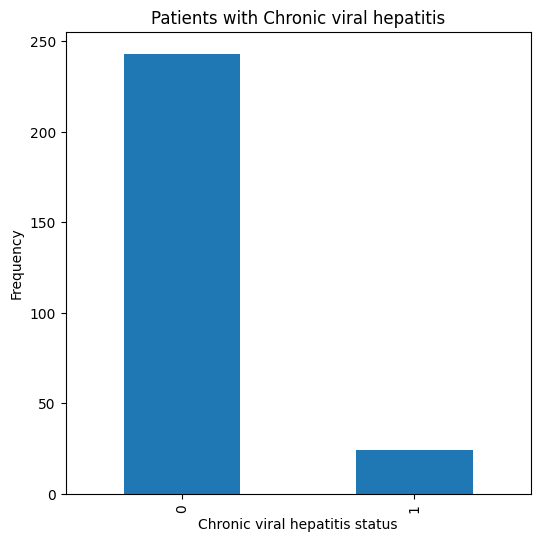

In [ ]:
#Chronic viral hepatitis
ax = clean_data['Chronic viral hepatitis'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with Chronic viral hepatitis")
ax.set_xlabel("Chronic viral hepatitis status")
ax.set_ylabel("Frequency")
plt.show()

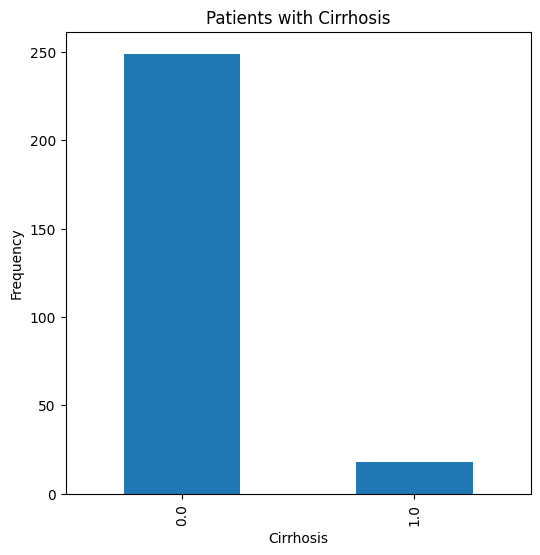

In [ ]:
#Chronic viral hepatitis
axA = clean_data['Cirrhosis'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with Cirrhosis")
axA.set_xlabel("Cirrhosis")
axA.set_ylabel("Frequency")
plt.show()

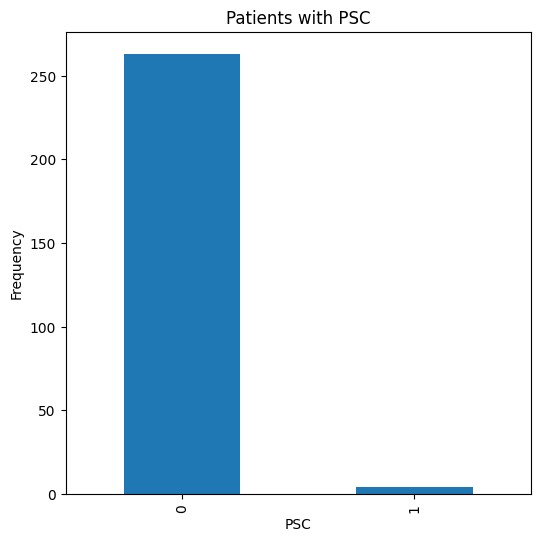

In [ ]:
#PSC
axB = clean_data['PSC'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with PSC")
axB.set_xlabel("PSC")
axB.set_ylabel("Frequency")
plt.show()

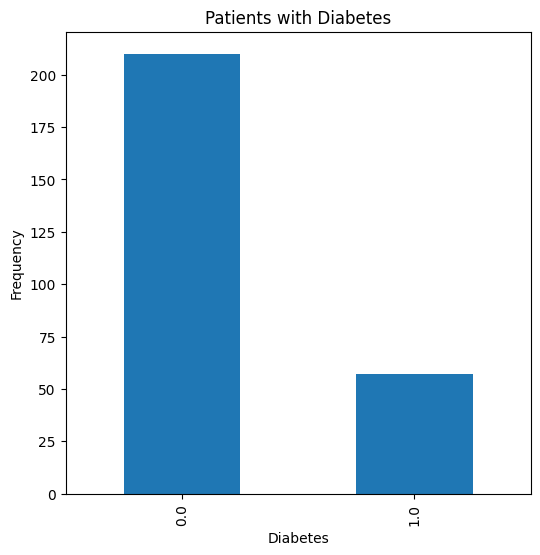

In [ ]:
#Diabetes Status
axC = clean_data['Diabetes Status'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with Diabetes")
axC.set_xlabel("Diabetes")
axC.set_ylabel("Frequency")
plt.show()

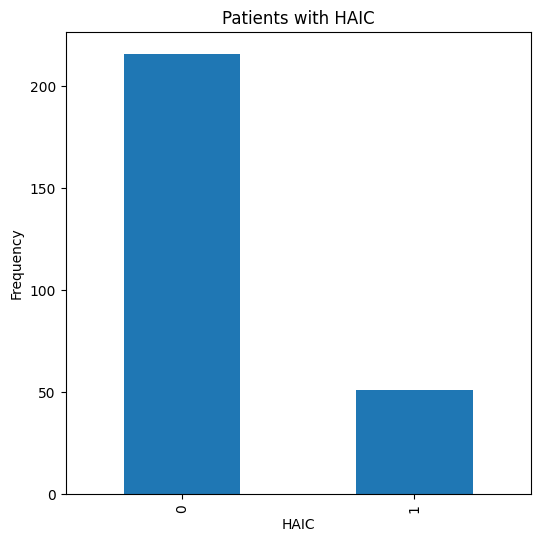

In [ ]:
#HAIC
axD = clean_data['HAIC'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with HAIC")
axD.set_xlabel("HAIC")
axD.set_ylabel("Frequency")
plt.show()

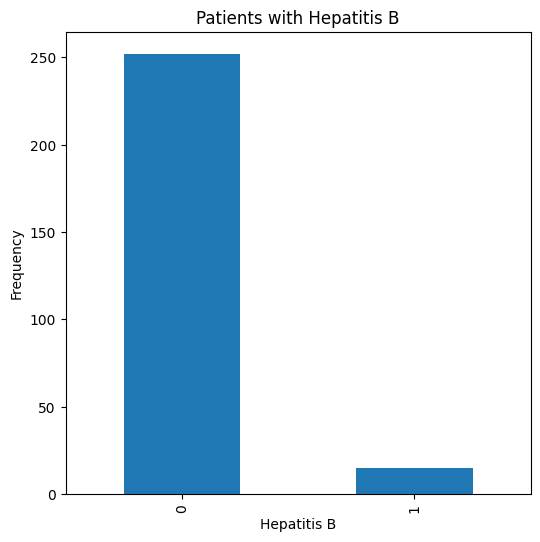

In [ ]:
#Hepatitis B
axE = clean_data['Hepatitis B'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with Hepatitis B")
axE.set_xlabel("Hepatitis B")
axE.set_ylabel("Frequency")
plt.show()

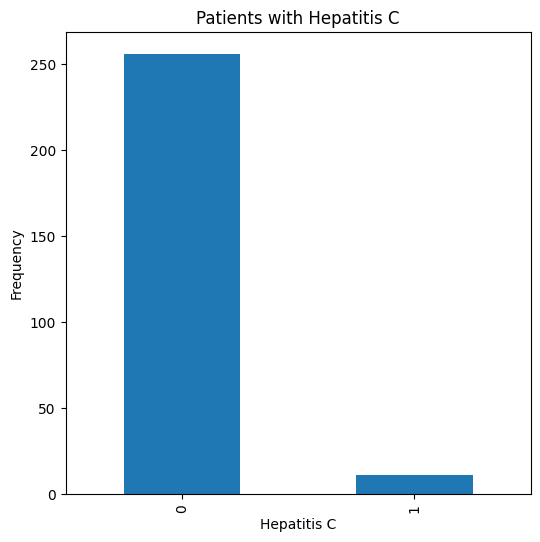

In [ ]:
#Hepatitis C
axF = clean_data['Hepatitis C'].value_counts().plot(kind='bar',
                                    figsize=(6,6),
                                    title="Patients with Hepatitis C")
axF.set_xlabel("Hepatitis C")
axF.set_ylabel("Frequency")
plt.show()

Create the ML model


This first Machine model that we will use is a logistic regression model. According the chatgpt Logistic Regression is a popular statistical algorithm used for binary classification tasks. It is a type of generalized linear model that predicts the probability of a binary outcome (e.g., true/false, yes/no, 0/1) based on one or more input features. Despite its name, it is actually a classification algorithm rather than a regression algorithm.

The basic idea behind logistic regression is to transform the output of a linear regression model into a probability using the logistic function (sigmoid function). The logistic function maps any real-valued number into a range between 0 and 1, making it suitable for representing probabilities.

In classical logistic regression, the target variable (also known as the dependent variable or response variable) is indeed binary. Logistic regression is specifically designed for binary classification tasks, where the target variable can take only two possible classes (e.g., 0/1, yes/no, true/false).

However, there is a variation called "Multinomial Logistic Regression" (or "Softmax Regression"), which can handle situations where the target variable has more than two classes. In multinomial logistic regression, the target variable can take on multiple classes, and the algorithm estimates multiple sets of coefficients for each class.

In scikit-learn's implementation of logistic regression, if the target variable y contains only two unique values, it will be treated as a binary classification problem by default. On the other hand, if y contains more than two unique values, scikit-learn will internally handle multinomial logistic regression for you.

In [ ]:
# The target variable here is the overall survival status. In the original dataset this not a binary datatype and thus I replaced the Living with 0 and deceased with 1
#Replace multiple values simultaneously
clean_data['Overall Survival Status'].replace({'0:LIVING': 0, '1:DECEASED': 1}, inplace=True)
clean_data

<ipython-input-35-5603ef479ded>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Sample ID,Diagnosis_Age,BMI,CA19,CA19 High,Chronic viral hepatitis,Cirrhosis,PSC,Diabetes Status,DZ Extent,...,Hepatitis C,Mutation Count,Overall_Sur_Months,Overall Survival Status,Number of Samples Per Patient,Sex,Smoking Status,TMB (nonsynonymous),Treatment Group,Tumor Grade
0,P-0000114-T01-IM3,57.737378,19.8,18.0,0.0,0,0.0,0,0.0,Metastatic disease,...,0,4.0,15.836163,1,1,Female,Never smoked,4.436621,Resected,Poorly differentiated
2,P-0000154-T01-IM3,76.525025,27.7,37.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,3.0,24.477056,1,1,Male,Never smoked,3.327466,Unresected,Moderately differentiated
3,P-0000189-T01-IM3,51.034936,26.2,37.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,3.0,44.387252,1,1,Male,Never smoked,3.327466,Unresected,Moderately differentiated
4,P-0000192-T02-IM3,69.214763,28.5,1132.0,1.0,0,0.0,0,0.0,Metastatic disease,...,0,2.0,24.082795,1,1,Male,Never smoked,2.218311,Unresected,Moderately differentiated
5,P-0000298-T01-IM3,56.362939,23.4,40.0,0.0,1,0.0,0,0.0,Solitary liver tumor,...,0,1.0,60.979082,1,1,Male,Never smoked,1.109155,Resected,Moderately differentiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,s_WJ_chol_094_T,79.763991,39.8,98.0,1.0,0,0.0,0,0.0,Solitary liver tumor,...,0,2.0,87.131749,1,1,Male,Former smoker,1.729396,Resected,Moderately differentiated
400,s_WJ_chol_095_T,60.215201,32.9,8.0,0.0,0,0.0,0,0.0,Multifocal liver disease,...,0,9.0,6.472456,1,1,Female,Former smoker,7.782283,Resected,Moderately differentiated
403,s_WJ_chol_103_T,51.396342,27.5,32.3,0.0,0,0.0,0,0.0,Solitary liver tumor,...,0,1.0,32.132297,1,1,Male,Former smoker,0.864698,Resected,Poorly differentiated
406,s_WJ_chol_108_T,56.464243,27.1,7.9,0.0,0,0.0,0,0.0,Metastatic disease,...,0,5.0,9.889388,1,1,Male,Never smoked,4.323490,Resected,Poorly differentiated


In [ ]:
#information about the data types for each column
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 408
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sample ID                      267 non-null    object 
 1   Diagnosis_Age                  267 non-null    float64
 2   BMI                            267 non-null    float64
 3   CA19                           267 non-null    float64
 4   CA19 High                      267 non-null    float64
 5   Chronic viral hepatitis        267 non-null    int64  
 6   Cirrhosis                      267 non-null    float64
 7   PSC                            267 non-null    int64  
 8   Diabetes Status                267 non-null    float64
 9   DZ Extent                      267 non-null    object 
 10  ECOG BIN                       267 non-null    object 
 11  Fraction Genome Altered        267 non-null    float64
 12  HAIC                           267 non-null    int

In [ ]:
# for the independent categorical variables, there will be convert to numeric using one-hot encoding
# Convert categorical variable 'gender' to numeric using one-hot encoding
clean_data2 = pd.get_dummies(clean_data, columns=['DZ Extent',
                                                  'ECOG BIN',
                                                  'Sex','Smoking Status',
                                                  'Treatment Group',
                                                  'Tumor Grade',
                                                  'HAIC','Hepatitis B',
                                                  'Hepatitis C',], drop_first=True)
clean_data2

,Sample ID,Diagnosis_Age,BMI,CA19,CA19 High,Chronic viral hepatitis,Cirrhosis,PSC,Diabetes Status,Fraction Genome Altered,...,ECOG BIN_3-Feb,Sex_Male,Smoking Status_Former smoker,Smoking Status_Never smoked,Treatment Group_Unresected,Tumor Grade_Poorly differentiated,Tumor Grade_Well differentiated,HAIC_1,Hepatitis B_1,Hepatitis C_1
0,P-0000114-T01-IM3,57.737378,19.8,18.0,0.0,0,0.0,0,0.0,0.1874,...,0,0,0,1,0,1,0,1,0,0
2,P-0000154-T01-IM3,76.525025,27.7,37.0,0.0,0,0.0,0,0.0,0.6038,...,0,1,0,1,1,0,0,1,0,0
3,P-0000189-T01-IM3,51.034936,26.2,37.0,0.0,0,0.0,0,0.0,0.3514,...,0,1,0,1,1,0,0,1,0,0
4,P-0000192-T02-IM3,69.214763,28.5,1132.0,1.0,0,0.0,0,0.0,0.1872,...,0,1,0,1,1,0,0,0,0,0
5,P-0000298-T01-IM3,56.362939,23.4,40.0,0.0,1,0.0,0,0.0,0.1896,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,s_WJ_chol_094_T,79.763991,39.8,98.0,1.0,0,0.0,0,0.0,0.3560,...,0,1,1,0,0,0,0,0,0,0
400,s_WJ_chol_095_T,60.215201,32.9,8.0,0.0,0,0.0,0,0.0,0.5158,...,0,0,1,0,0,0,0,0,0,0
403,s_WJ_chol_103_T,51.396342,27.5,32.3,0.0,0,0.0,0,0.0,0.0967,...,0,1,1,0,0,1,0,0,0,0
406,s_WJ_chol_108_T,56.464243,27.1,7.9,0.0,0,0.0,0,0.0,0.1458,...,0,1,0,1,0,1,0,0,0,0


In [ ]:
#information about the data types for each column
clean_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 408
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sample ID                           267 non-null    object 
 1   Diagnosis_Age                       267 non-null    float64
 2   BMI                                 267 non-null    float64
 3   CA19                                267 non-null    float64
 4   CA19 High                           267 non-null    float64
 5   Chronic viral hepatitis             267 non-null    int64  
 6   Cirrhosis                           267 non-null    float64
 7   PSC                                 267 non-null    int64  
 8   Diabetes Status                     267 non-null    float64
 9   Fraction Genome Altered             267 non-null    float64
 10  Mutation Count                      267 non-null    float64
 11  Overall_Sur_Months                  267 non-n

In [ ]:
# Split the data into features (X) and target variable (y)
X = clean_data2[['Diagnosis_Age', 'BMI', 'CA19','CA19 High','Chronic viral hepatitis','Cirrhosis','PSC','Diabetes Status','Fraction Genome Altered','Mutation Count','Overall_Sur_Months','Number of Samples Per Patient','TMB (nonsynonymous)','DZ Extent_Multifocal liver disease','DZ Extent_Solitary liver tumor','ECOG BIN_1','ECOG BIN_3-Feb','Sex_Male','Smoking Status_Former smoker','Smoking Status_Never smoked','Treatment Group_Unresected','Tumor Grade_Poorly differentiated','Tumor Grade_Well differentiated','HAIC_1','Hepatitis B_1','Hepatitis C_1']]

y = clean_data2['Overall Survival Status']

Selecting the test size and random state when splitting your data into training and testing sets is an important step in machine learning. The choice of these parameters can impact your model's performance and reproducibility. Here are some guidelines for selecting the test size and random state:

Test Size:
The test size refers to the proportion of your data that you want to allocate for testing the model's performance. The remaining portion will be used for training. A common practice is to use a test size of 20% to 30% of the total data. However, the appropriate test size can depend on the size of your dataset. For smaller datasets, you might want to use a larger test size to have enough data for evaluation. For larger datasets, a smaller test size may suffice.

For instance, you can use the test_size parameter in the train_test_split function from scikit-learn to specify the desired test size. For example, test_size=0.2 would allocate 20% of the data for testing and 80% for training.

Random State:
The random state is used to ensure reproducibility. When you use a random state, the data will be split in the same way every time you run the code, making your results consistent. Setting the random state is particularly useful during the development and testing phase.

You can set the random_state parameter in the train_test_split function to any integer value. It doesn't matter what value you use, as long as you keep it the same across different runs of your code if you want to reproduce the exact same split.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

In [ ]:
# Initialize RFE with the linear regression model
rfe = RFE(estimator=logreg, n_features_to_select=1)

In [ ]:
# Fit RFE on the training data
rfe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [ ]:
# Get the ranking of features (1: most important, 2: second most important, etc.)
feature_ranking = rfe.ranking_
feature_ranking

array([22, 24, 26,  7,  1, 11, 17, 25, 15, 10, 23, 21,  9,  3,  2, 19, 16,
        8,  6,  5, 12, 18, 20, 13, 14,  4])

In [ ]:
# Select the most important feature(s) based on the ranking
selected_features = X_train.columns[rfe.support_]

In [ ]:
# Train the model on the selected features
logreg.fit(X_train[selected_features], y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred = logreg.predict(X_test[selected_features])


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7037037037037037
Confusion Matrix:
[[ 0 24]
 [ 0 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.70      1.00      0.83        57

    accuracy                           0.70        81
   macro avg       0.35      0.50      0.41        81
weighted avg       0.50      0.70      0.58        81

